# Obdelava podatkov 2. del

In [2]:
import datetime
import csv
import pandas as pd
import numpy as np

In [6]:
column_names = [ 'Type A', 'Measure A', 'Units A',
                 'Type B', 'Measure B', 'Units B',
                 'Type C', 'Measure C', 'Units C', 
                 'Datetime']
#izvozi podatke in poimenuj stolpce
df_redundant=pd.read_csv('data/DATA_rpi_data_long_R.csv', names=column_names)
df_redundant.head()


,Type A,Measure A,Units A,Type B,Measure B,Units B,Type C,Measure C,Units C,Datetime
0,Ping:,26.992,ms,Download:,91.80,Mbit/s,Upload:,14.31,Mbit/s,2016-11-24 13:36:25
1,Ping:,24.532,ms,Download:,88.19,Mbit/s,Upload:,14.12,Mbit/s,2016-11-24 13:36:55
2,Ping:,20.225,ms,Download:,59.86,Mbit/s,Upload:,14.11,Mbit/s,2016-11-24 13:37:25
3,Ping:,19.332,ms,Download:,91.81,Mbit/s,Upload:,14.22,Mbit/s,2016-11-24 13:37:57
4,Ping:,22.494,ms,Download:,92.05,Mbit/s,Upload:,14.08,Mbit/s,2016-11-24 13:38:27


**Urejanje prikaza podatkov**



In [7]:
df_compact=df_redundant.copy() #naredi novo tabelo z imenom df_compact

In [8]:
map_dict = {'Measure A':'Ping (ms)', 'Measure B': 'Download (Mbit/s)', 'Measure C': 'Upload (Mbit/s)'} 


In [11]:
#preimenuj stolpce katere bomo uporabljali
df_compact.rename(columns=map_dict, inplace=True)
df_compact.head()


,Type A,Ping (ms),Units A,Type B,Download (Mbit/s),Units B,Type C,Upload (Mbit/s),Units C,Datetime
0,Ping:,26.992,ms,Download:,91.80,Mbit/s,Upload:,14.31,Mbit/s,2016-11-24 13:36:25
1,Ping:,24.532,ms,Download:,88.19,Mbit/s,Upload:,14.12,Mbit/s,2016-11-24 13:36:55
2,Ping:,20.225,ms,Download:,59.86,Mbit/s,Upload:,14.11,Mbit/s,2016-11-24 13:37:25
3,Ping:,19.332,ms,Download:,91.81,Mbit/s,Upload:,14.22,Mbit/s,2016-11-24 13:37:57
4,Ping:,22.494,ms,Download:,92.05,Mbit/s,Upload:,14.08,Mbit/s,2016-11-24 13:38:27


In [12]:
map_dict = {'Measure A':'Ping (ms)', 'Measure B': 'Download (Mbit/s)', 'Measure C': 'Upload (Mbit/s)'}

In [13]:
#odstrani vse stolpce iz datafrajma
drop_list = ['Type A', 'Type B', 'Type C', 'Units A', 'Units B', 'Units C']
df_compact.drop(drop_list, axis=1,inplace=True)
df_compact.head()


,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime
0,26.992,91.80,14.31,2016-11-24 13:36:25
1,24.532,88.19,14.12,2016-11-24 13:36:55
2,20.225,59.86,14.11,2016-11-24 13:37:25
3,19.332,91.81,14.22,2016-11-24 13:37:57
4,22.494,92.05,14.08,2016-11-24 13:38:27


In [14]:
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 4 columns):
Ping (ms)            679 non-null object
Download (Mbit/s)    679 non-null object
Upload (Mbit/s)      673 non-null float64
Datetime             673 non-null object
dtypes: float64(1), object(3)
memory usage: 21.3+ KB


**Urejanje datuma in časa**



In [20]:
pd.to_datetime(df_compact['Datetime'][0])
type(pd.to_datetime(df_compact['Datetime'][0]))

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
pd.to_datetime(df_compact['Datetime'][0]).date()

datetime.date(2016, 11, 24)

In [23]:
#naredi nov stolpec z samo datumom ampak pazi da bo pravega tipa
pd.to_datetime(df_compact['Datetime'])
df_compact['Date']=pd.to_datetime(df_compact['Datetime']).dt.date
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime,Date
0,26.992,91.80,14.31,2016-11-24 13:36:25,2016-11-24
1,24.532,88.19,14.12,2016-11-24 13:36:55,2016-11-24
2,20.225,59.86,14.11,2016-11-24 13:37:25,2016-11-24
3,19.332,91.81,14.22,2016-11-24 13:37:57,2016-11-24
4,22.494,92.05,14.08,2016-11-24 13:38:27,2016-11-24


In [28]:
#isto
df_compact['Date']=df_compact['Datetime'].apply(lambda dt_str: pd.to_datetime(dt_str).date())
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime,Date
0,26.992,91.80,14.31,2016-11-24 13:36:25,2016-11-24
1,24.532,88.19,14.12,2016-11-24 13:36:55,2016-11-24
2,20.225,59.86,14.11,2016-11-24 13:37:25,2016-11-24
3,19.332,91.81,14.22,2016-11-24 13:37:57,2016-11-24
4,22.494,92.05,14.08,2016-11-24 13:38:27,2016-11-24


In [29]:
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 5 columns):
Ping (ms)            679 non-null object
Download (Mbit/s)    679 non-null object
Upload (Mbit/s)      673 non-null float64
Datetime             673 non-null object
Date                 673 non-null object
dtypes: float64(1), object(4)
memory usage: 26.6+ KB


In [36]:
#naredi nov stolpec in od stolpca datetime vzuemi samo time in odstrani DateTime stolpc
#df_compact.dropna()
df_compact['Time']=pd.to_datetime(df_compact['Datetime']).dt.time
df_compact.drop('Datetime',axis=1, inplace=True)
df_compact.head()


,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [38]:
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 5 columns):
Ping (ms)            679 non-null object
Download (Mbit/s)    679 non-null object
Upload (Mbit/s)      673 non-null float64
Date                 673 non-null object
Time                 673 non-null object
dtypes: float64(1), object(4)
memory usage: 26.6+ KB


In [39]:
df_compact.to_csv('data/OUT_rpi_data_compact.csv')

## Visualization


#### Clean and Analyze Data


**Čiščenje podatkov**



In [40]:
#končno čiščenje podatkov neprimernih vrednosti in vizualizacija
#preberemo čisto verzijo.
df_compact=pd.read_csv('data/OUT_rpi_data_compact.csv')
df_compact.head()

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


In [43]:
df_compact.drop('Unnamed: 0', axis=1, inplace=True)
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [44]:
#pregled manjkajočih vrednosti
NaNs_in_df= df_compact.isnull()
NaNs_in_df.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [47]:
#število manjkajočih vrednosti po stolpcih
NaNs_in_df.sum()

Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Date                 7
Time                 7
dtype: int64

In [48]:
#število manjkajočih vrednosti skupaj v tabeli
NaNs_in_df.sum().sum()

23

In [49]:
NaNs_total=NaNs_in_df.sum().sum()

In [54]:
#izračunajkoliko procentov vrednosti je NAN
NaNs_pct=np.round(NaNs_total/float(len(df_compact.columns)*len(df_compact))*100,decimals=4)

In [55]:
print(f'The DataFrame contains : {NaNs_total} NaNs, equal to {NaNs_pct}% of the measurements')

The DataFrame contains : 23 NaNs, equal to 0.6765% of the measurements


In [64]:
#izbriši vse neznane vrednosti
df_compact_clean=df_compact.dropna()

**Change values format.**

In [65]:
df_compact_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 0 to 679
Data columns (total 5 columns):
Ping (ms)            673 non-null object
Download (Mbit/s)    673 non-null object
Upload (Mbit/s)      673 non-null float64
Date                 673 non-null object
Time                 673 non-null object
dtypes: float64(1), object(4)
memory usage: 31.5+ KB


In [66]:
#resetiri indeks in mu izbrši stari stolpc
df_compact_clean.reset_index(inplace=True, drop=True)
df_compact_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 5 columns):
Ping (ms)            673 non-null object
Download (Mbit/s)    673 non-null object
Upload (Mbit/s)      673 non-null float64
Date                 673 non-null object
Time                 673 non-null object
dtypes: float64(1), object(4)
memory usage: 26.4+ KB


In [67]:
#df_compact_clean.drop('index',inplace=True)
df_compact_clean.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [68]:
df_compact_clean = df_compact_clean.astype({"Ping (ms)":'float64','Download (Mbit/s)':'float64'
                                            ,'Upload (Mbit/s)':'float64',
                                           'Date':'datetime64','Time':'datetime64'})

In [69]:
df_compact_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 5 columns):
Ping (ms)            673 non-null float64
Download (Mbit/s)    673 non-null float64
Upload (Mbit/s)      673 non-null float64
Date                 673 non-null datetime64[ns]
Time                 673 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3)
memory usage: 26.4 KB


In [70]:
df_compact_clean.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,2019-06-03 13:36:25
1,24.532,88.19,14.12,2016-11-24,2019-06-03 13:36:55
2,20.225,59.86,14.11,2016-11-24,2019-06-03 13:37:25
3,19.332,91.81,14.22,2016-11-24,2019-06-03 13:37:57
4,22.494,92.05,14.08,2016-11-24,2019-06-03 13:38:27


In [71]:
#razvrsti stolpce po želji
reindexed_columns=['Date','Time','Ping (ms)','Download (Mbit/s)','Upload (Mbit/s)']
df_compact_clean=df_compact_clean.reindex(columns=reindexed_columns)
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,2019-06-03 13:36:25,26.992,91.80,14.31
1,2016-11-24,2019-06-03 13:36:55,24.532,88.19,14.12
2,2016-11-24,2019-06-03 13:37:25,20.225,59.86,14.11
3,2016-11-24,2019-06-03 13:37:57,19.332,91.81,14.22
4,2016-11-24,2019-06-03 13:38:27,22.494,92.05,14.08


In [72]:
df_clean=df_compact_clean.copy()

In [ ]:
#izračuni standardni odklon


In [ ]:
reidexed_columns = ['Date', 'Time', 'Ping (ms)','Download (Mbit/s)','Upload (Mbit/s)']

## Basic statistics


**Calculate mean and standard deviation using Pandas.**


In [73]:
#izračun std odklon
means=df_clean.mean()
means

Ping (ms)            21.115452
Download (Mbit/s)    90.449212
Upload (Mbit/s)      13.697608
dtype: float64

In [74]:
#standardno deviacijo
stands=df_clean.std()
stands

Ping (ms)            5.161225
Download (Mbit/s)    3.465647
Upload (Mbit/s)      1.080471
dtype: float64

In [75]:
#
means['Ping (ms)']

21.115451708766724

In [81]:
#nekaj statistike
print(f"Average ping time: {means['Ping (ms)']} ± {stands['Ping (ms)']} ms")
#print(f'Average download speed: {stats_download[0]} ± {stats_download[1]} Mbit/s')
#print(f'Average upload speed: {stats_upload[0]} ± {stats_upload[1]} Mbit/s')

Average ping time: 21.115451708766724 ± 5.161225495663228 ms


**Izračun minimalnih in maksimalnih vrednosti**


In [82]:
mins=df_clean.min()
mins

Date                 2016-11-24 00:00:00
Time                 2019-06-03 13:36:25
Ping (ms)                         16.167
Download (Mbit/s)                  58.48
Upload (Mbit/s)                     6.21
dtype: object

In [86]:
maksimum=df_clean.max()
maksimum

Date                 2016-11-24 00:00:00
Time                 2019-06-03 19:18:16
Ping (ms)                         76.528
Download (Mbit/s)                  92.87
Upload (Mbit/s)                    14.55
dtype: object

In [89]:
df_clean.describe().round(decimals=2)
df_clean

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
count,673.00,673.00,673.00
mean,21.12,90.45,13.70
std,5.16,3.47,1.08
min,16.17,58.48,6.21
25%,19.11,90.22,13.64
50%,20.32,91.56,13.98
75%,21.84,92.07,14.18
max,76.53,92.87,14.55


In [ ]:
print(f'Min ping time: {mima_ping[0]} ms. Max ping time: {mima_ping[1]} ms')
print(f'Min download speed: {mima_download[0]} Mbit/s. Max download speed: {mima_download[1]} Mbit/s')
print(f'Min upload speed: {mima_upload[0]} Mbit/s. Max upload speed: {mima_upload[1]} Mbit/s')

**Uporaba idxmin, idxmax and iloc**


In [ ]:
print(f'Ping measure reached minimum on {} at {}')

print(f'Ping measure reached maximum on {} at {}')

In [93]:
#napiši skripto, da ko pade internet na minumum pošlje operaterju mail s časom, kdaj se je to zgodil.
#probati z idxmin in idx max

df_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,2019-06-03 13:36:25,26.992,91.80,14.31
1,2016-11-24,2019-06-03 13:36:55,24.532,88.19,14.12
2,2016-11-24,2019-06-03 13:37:25,20.225,59.86,14.11
3,2016-11-24,2019-06-03 13:37:57,19.332,91.81,14.22
4,2016-11-24,2019-06-03 13:38:27,22.494,92.05,14.08


In [99]:
argmax_ping=df_clean['Ping (ms)'].idxmax()
argmax_ping

461

In [100]:
argmin_ping=df_clean['Ping (ms)'].idxmin()
argmin_ping

217

In [104]:
#tako pišemo vse parametre od maksimuma in minimuma
df_clean.iloc[argmin_ping]['Time'].time()

datetime.time(15, 26, 20)

In [105]:
#koleracija, ugotovi download v odvisnosti od downloada dobil bomo vrednost med 1 in -1. bolj je negativno manj je povezano.
#metoda v pandasu

df_corr=df_clean.corr()
df_corr.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
Ping (ms),1.000000,-0.045626,-0.463099
Download (Mbit/s),-0.045626,1.000000,0.083690
Upload (Mbit/s),-0.463099,0.083690,1.000000


In [107]:
print(f'Correlation coefficient between ping and download: {df_corr.iloc[0,1]}')
#print(f'Correlation coefficient between ping and upload: {}')
#print(f'Correlation coefficient between upload and download: {}')

Correlation coefficient between ping and download: -0.045626110258379995


## Visualize Data



In [108]:
import matplotlib.pyplot as plt
%matplotlib inline 

**Plot Internet speed stats.**


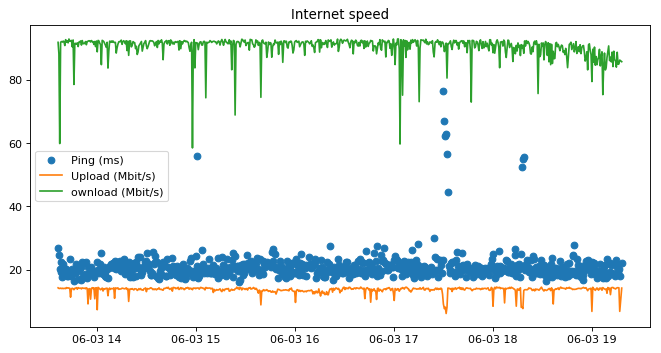

In [115]:
plt.figure(figsize=(10,5),dpi=80)
t=pd.to_datetime(df_clean['Time'])
plt.plot(t,df_clean['Ping (ms)'],'o',label='Ping (ms)')
plt.plot(t,df_clean['Upload (Mbit/s)'],label='Upload (Mbit/s)')
plt.plot(t,df_clean['Download (Mbit/s)'],label='ownload (Mbit/s)')

plt.title('Internet speed')

plt.legend()
plt.show()

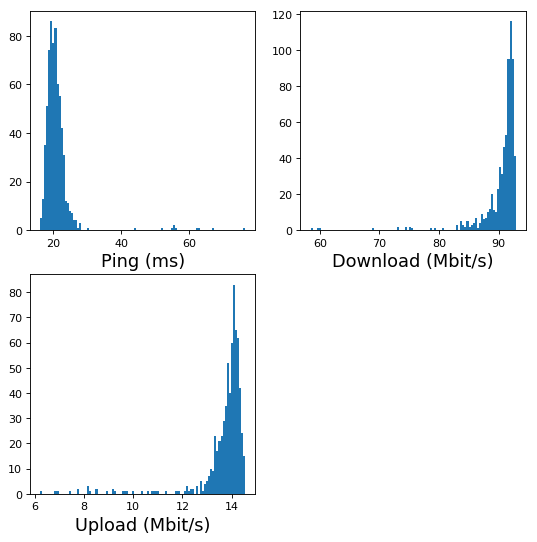

In [120]:
#histogrami
plt.figure(figsize=(8,8),dpi=80)

plt.subplot(2,2,1)
plt.hist(df_clean['Ping (ms)'],100)
plt.xlabel('Ping (ms)', fontsize=16)
plt.tick_params(labelsize=10)

plt.subplot(2,2,2)
plt.hist(df_clean['Download (Mbit/s)'],100)
plt.xlabel('Download (Mbit/s)', fontsize=16)
plt.tick_params(labelsize=10)

plt.subplot(2,2,3)
plt.hist(df_clean['Upload (Mbit/s)'],100)
plt.xlabel('Upload (Mbit/s)', fontsize=16)
plt.tick_params(labelsize=10)


## Internet Meter Anomaly Detection 


**Create a Dataframe and modify the quantities**



In [ ]:
#interaktivni grafi, iskanje podatkov
# iskanje katere vrednosti so znotraj nekega okvija kateri pa niso

In [121]:
df_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,2019-06-03 13:36:25,26.992,91.80,14.31
1,2016-11-24,2019-06-03 13:36:55,24.532,88.19,14.12
2,2016-11-24,2019-06-03 13:37:25,20.225,59.86,14.11
3,2016-11-24,2019-06-03 13:37:57,19.332,91.81,14.22
4,2016-11-24,2019-06-03 13:38:27,22.494,92.05,14.08


In [124]:
#pingrate =1/pingtime
df_rates=df_clean.copy()
df_rates.drop(['Date','Time','Ping (ms)'],axis=1,inplace=True)
lookup = {'Download (Mbit/s)': 'download_rate', 
          'Upload (Mbit/s)': 'upload_rate'}
df_rates.rename(columns=lookup, inplace=True)
ping_rate=1. /df_clean['Ping (ms)'] #1. zato, da pokažeš, da boš delil floate
ping_rate=1000*ping_rate
df_rates['ping_rate']=ping_rate

df_rates.head()

,download_rate,upload_rate,ping_rate
0,91.80,14.31,37.048014
1,88.19,14.12,40.763085
2,59.86,14.11,49.443758
3,91.81,14.22,51.727705
4,92.05,14.08,44.456299


**Vizualizacija podatkov**



In [125]:
#risanje zgornjih podatkov
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

In [126]:
def f(x):
    return x**2

In [127]:
#napiši katero funkcijo pa območje,doterega želiš izračun.

interact(f,x=(0,100))

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

In [134]:
def scatter_view (x,y,z,azim,elev):
    fig= plt.figure(figsize=(8,8), dpi=80)
    ax=Axes3D(fig)
    
    ax.scatter(x,y,z)
    ax.set_xlabel('D rate (Mbit/s)', fontsize=16)
    ax.set_ylabel('U rate (Mbit/s)', fontsize=16)
    ax.set_zlabel('P rate (1/s)', fontsize=16)
    
    ax.azim=azim
    ax.elev=elev

In [135]:
xi=df_rates['download_rate']
yi=df_rates['upload_rate']
zi=df_rates['ping_rate']

interact(lambda azim, elev: scatter_view(xi,yi,zi,azim,elev), azim=(0,90), elev=(0,90))
plt.show()

interactive(children=(IntSlider(value=45, description='azim', max=90), IntSlider(value=45, description='elev',…

**Euclidean Anomaly Detection**
